<a href="https://colab.research.google.com/github/oymin2001/DataScience/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#0. Null Data

In [ ]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

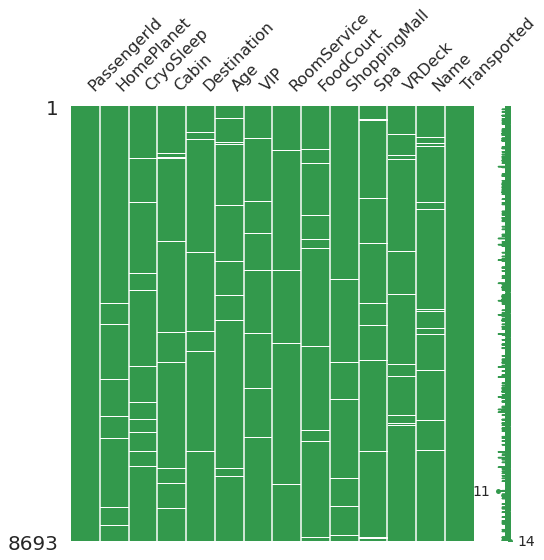

In [ ]:
msno.matrix(df, figsize=(8,8), color=(0.2,0.6,0.3))

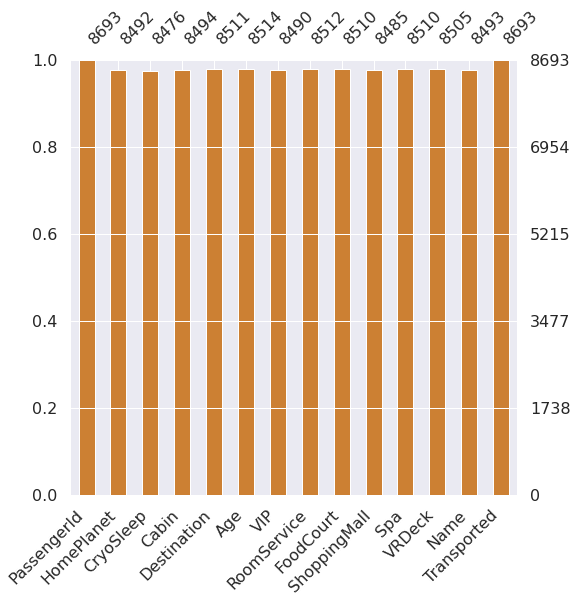

In [ ]:
msno.bar(df, figsize=(8,8), color=(.8, .5, .2))

In [ ]:
df_sortByStd = df.describe().T.sort_values(by='std', ascending=False)
df_sortByStd

,count,mean,std,min,25%,50%,75%,max
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0


In [ ]:
df_sortByStd.style.background_gradient(cmap='GnBu')

,count,mean,std,min,25%,50%,75%,max
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000


In [ ]:
df_sortByStd.style.background_gradient(cmap='GnBu').bar(subset=['std'])

,count,mean,std,min,25%,50%,75%,max
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000


# 1. Numeric Data

## 1.1 Correlation

In [ ]:
house = pd.read_csv('/content/sample_data/california_housing_train.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
house.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


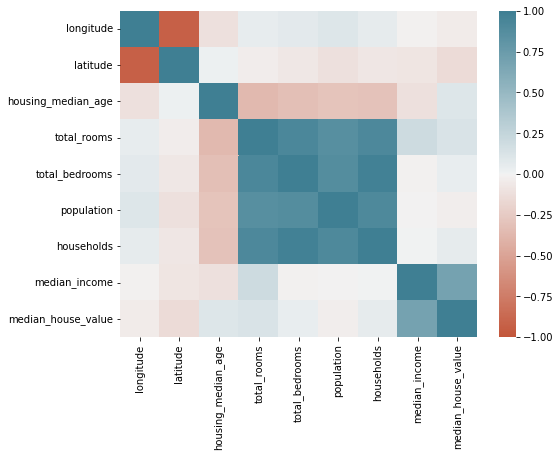

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(house.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)
plt.show()

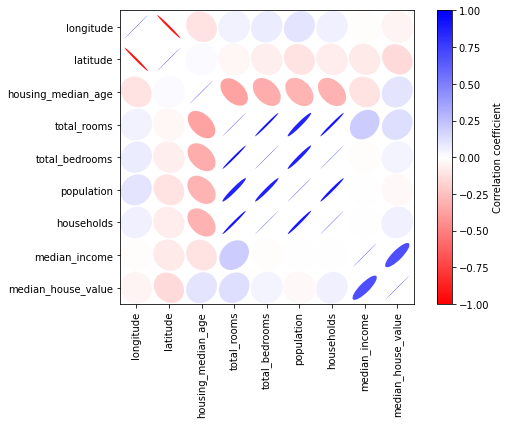

In [ ]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(house.corr(), figsize=(8, 6), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

## 1.2 Hexagonal binning and Contours


In [ ]:
new_corrs = []
for col in house.columns:
    new_corrs.append((col, house['median_house_value'].corr(house[col])))

new_corrs[:-1]

[('longitude', -0.04498169651091466),
 ('latitude', -0.14491671733762976),
 ('housing_median_age', 0.10675770707287639),
 ('total_rooms', 0.13099146625326677),
 ('total_bedrooms', 0.04578305197954591),
 ('population', -0.027850061120898374),
 ('households', 0.0610306337890809),
 ('median_income', 0.6918706037806693)]

In [ ]:
new_corrs = sorted(new_corrs[:-1], key=lambda x:abs(x[1]), reverse= True)
new_corrs

[('median_income', 0.6918706037806693),
 ('latitude', -0.14491671733762976),
 ('total_rooms', 0.13099146625326677),
 ('housing_median_age', 0.10675770707287639),
 ('households', 0.0610306337890809),
 ('total_bedrooms', 0.04578305197954591),
 ('longitude', -0.04498169651091466),
 ('population', -0.027850061120898374)]

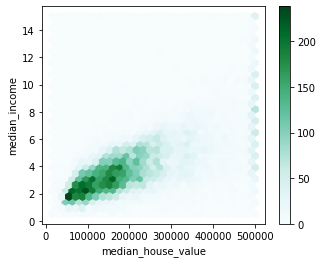

In [ ]:
ax = house.plot.hexbin(x='median_house_value', y='median_income',
                       gridsize=30, sharex=False, figsize=(5, 4))

ax.set_xlabel('median_house_value')
ax.set_ylabel('median_income')

plt.show()

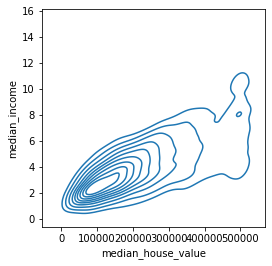

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=house, x='median_house_value', y='median_income', ax=ax)

ax.set_xlabel('median_house_value')
ax.set_ylabel('median_income')
plt.show()

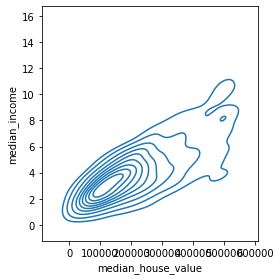

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=house.sample(1000), x='median_house_value', y='median_income', ax=ax)

ax.set_xlabel('median_house_value')
ax.set_ylabel('median_income')

plt.tight_layout()
plt.show()

##1.3 Histogram


In [ ]:
df_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
df_test = pd.read_csv('/content/sample_data/california_housing_test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df_train['type'] = 'train'
df_test['type'] = 'test'
concat_df = pd.concat([df_train, df_test])

import plotly.express as px
fig = px.histogram(data_frame=concat_df, x="median_house_value", color="type", color_discrete_sequence =  ['#58D68D','#DE3163'],
                   marginal='box', nbins=100, template='plotly_white')
fig.update_layout(title="Distribution of Median_hounse_value", title_x=.5)
fig.show()